# Project-13 Predict Doctor Fees

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. We have some past data that records important details about a doctor and we will be building a model to predict the doctor’s consulting fee.

In [1]:
# importing esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset :
train=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')

#EDA Process

In [3]:
# lets check the first five records :
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
data=pd.concat([train,test],ignore_index=True)

In [6]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [7]:
data.shape

(7948, 7)

In [8]:
data.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [9]:
# total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 434.8+ KB


In [10]:
# lets check the null values :
data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [11]:
data.shape

(7948, 7)

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(2577, 7)

In [14]:
data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

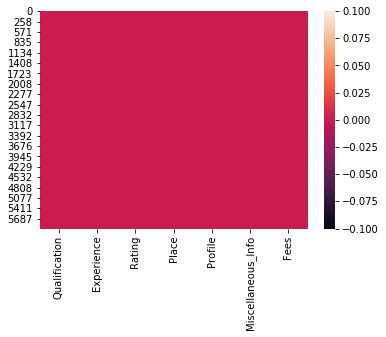

In [15]:
sns.heatmap(data.isnull())

In [16]:
# column name of the data (features of the dataset) :
data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [17]:
data['Qualification'].value_counts()

BDS                                                                                          240
MBBS, MD - Dermatology                                                                       117
BHMS                                                                                         110
MBBS, MS - ENT                                                                                97
BAMS                                                                                          76
                                                                                            ... 
BDS, MDS - Prosthodontist And Crown Bridge, Fellow of Academy of General Education (FAGE)      1
LCEH, MD - Homeopathy                                                                          1
MBBS, DVD, DDV, MD - Dermatology                                                               1
MBBS, MD - Dermatology , Venereology & Leprosy, DVD                                            1
BDS, MS - Pediatric           

In [18]:
data['Qualification'].value_counts()

BDS                                                                                          240
MBBS, MD - Dermatology                                                                       117
BHMS                                                                                         110
MBBS, MS - ENT                                                                                97
BAMS                                                                                          76
                                                                                            ... 
BDS, MDS - Prosthodontist And Crown Bridge, Fellow of Academy of General Education (FAGE)      1
LCEH, MD - Homeopathy                                                                          1
MBBS, DVD, DDV, MD - Dermatology                                                               1
MBBS, MD - Dermatology , Venereology & Leprosy, DVD                                            1
BDS, MS - Pediatric           

In [19]:
data['Rating'].value_counts()

100%    654
98%     289
99%     258
97%     235
96%     216
95%     174
94%     111
93%      98
92%      65
90%      63
91%      58
89%      40
88%      40
85%      27
86%      21
82%      20
83%      20
80%      18
77%      15
87%      13
67%      12
84%      12
81%      12
79%      12
76%       9
71%       8
73%       8
75%       8
74%       7
60%       7
78%       6
56%       5
68%       5
69%       4
72%       3
70%       3
55%       2
63%       2
64%       2
62%       2
33%       2
57%       2
36%       1
48%       1
65%       1
40%       1
45%       1
7%        1
53%       1
58%       1
47%       1
Name: Rating, dtype: int64

In [20]:
data['Place'].value_counts()

HSR Layout, Bangalore             45
Dwarka, Delhi                     37
Banjara Hills, Hyderabad          33
Indiranagar, Bangalore            32
Whitefield, Bangalore             30
                                  ..
Rohini Sector 7, Delhi             1
Jayanagar 7 Block, Bangalore       1
Akshaya nagar, Bangalore           1
Koramangala 8 Block, Bangalore     1
Kailash Colony, Delhi              1
Name: Place, Length: 561, dtype: int64

In [21]:
data['Profile'].value_counts()

Dentist             862
Dermatologists      628
General Medicine    371
ENT Specialist      295
Homeopath           246
Ayurveda            175
Name: Profile, dtype: int64

In [22]:
data['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                          38
Tooth Extraction Dental Fillings Scaling / Polishing                                        10
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment         8
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing     8
Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction Conservative Dentistry       7
                                                                                            ..
Laser Resurfacing Blepharoplasty Dermabrasion                                                1
93% 36 Feedback August Kranti Marg, Delhi                                                    1
99% 39 Feedback Okhla, Delhi                                                                 1
93% 9 Feedback Lakdikapul, Hyderabad                                                         1
100% 1 Feedback Mahim, Mumbai                     

In [23]:
data['Fees'].value_counts()

500.0    504
100.0    459
300.0    399
200.0    385
400.0    234
600.0    105
250.0    100
700.0     86
150.0     74
800.0     73
350.0     63
450.0     24
750.0     23
650.0     17
550.0     11
900.0      9
50.0       2
380.0      2
220.0      1
920.0      1
950.0      1
80.0       1
430.0      1
260.0      1
125.0      1
Name: Fees, dtype: int64

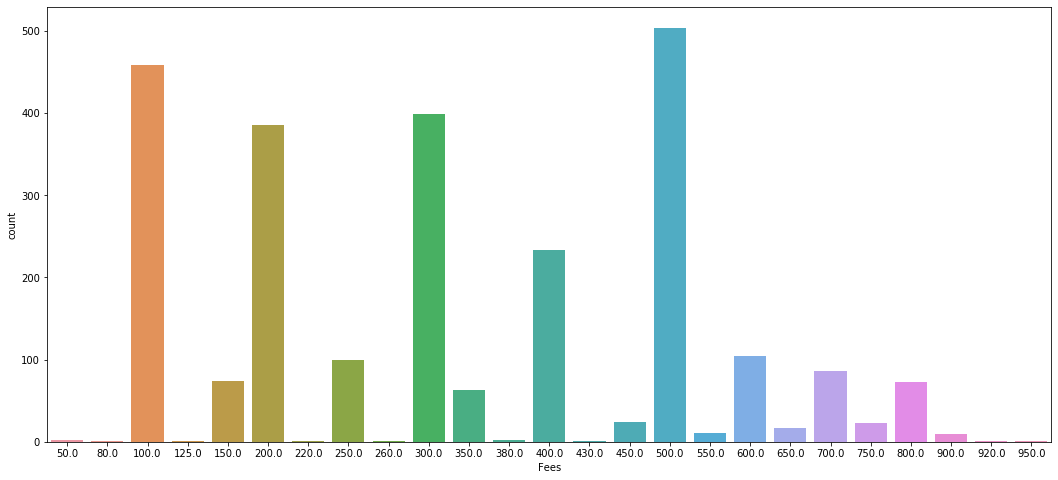

In [24]:
plt.figure(figsize=(18,8))
sns.countplot(data['Fees'])

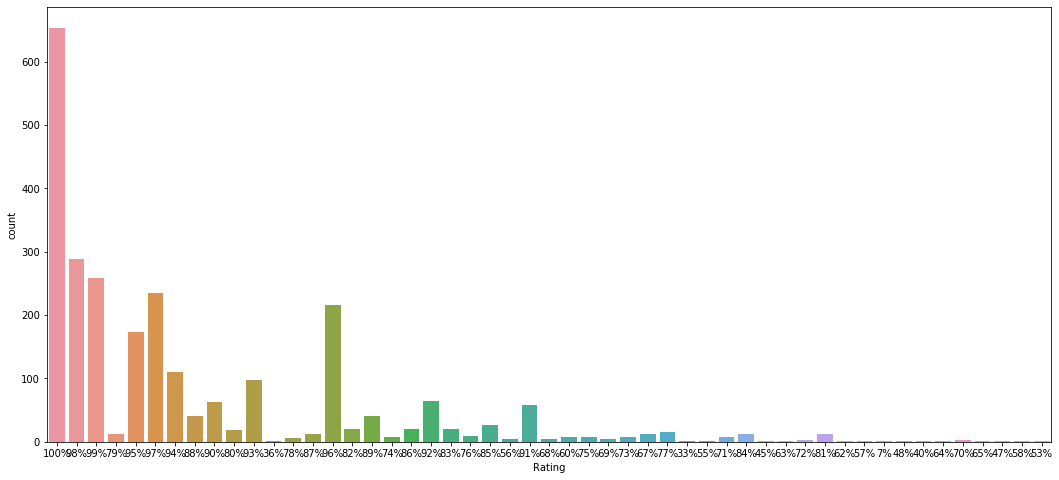

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(x='Rating',data=data)

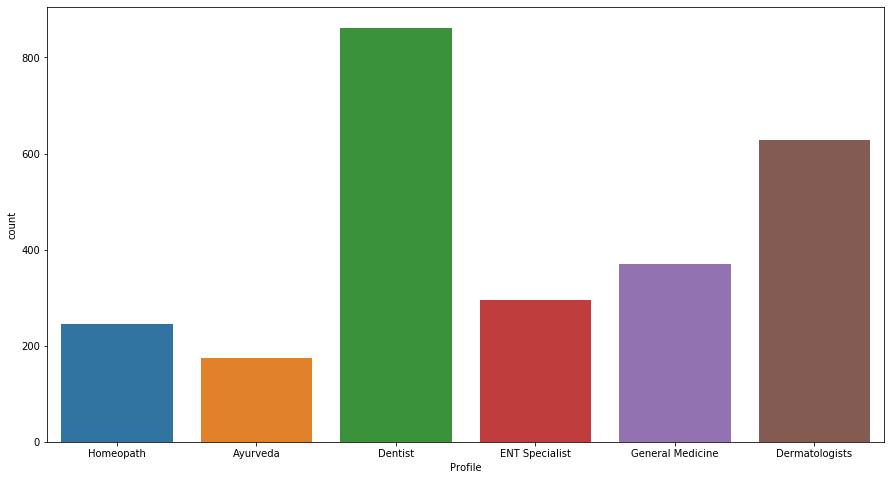

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='Profile',data=data)
plt.show()

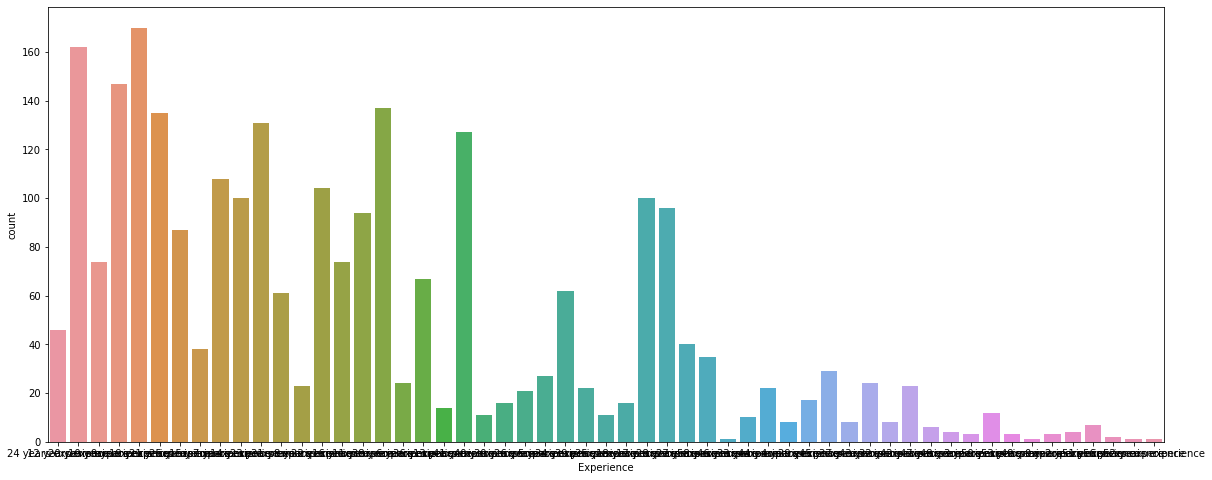

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x='Experience',data=data)
plt.show()

In [28]:
# importing the labelencoder to convert object datatypes to numerical values :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=le.fit_transform(data[i])

In [30]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,263,16,0,203,5,105,100.0
1,28,3,49,553,0,1361,350.0
4,2,12,0,226,0,228,250.0
7,53,1,50,26,1,1754,200.0
12,114,54,49,95,1,1252,200.0


In [31]:
# stastical analysis :
data.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,369.277454,19.397749,32.789290,266.121847,2.218471,1227.390376,343.440047
std,246.582641,18.227719,20.286961,164.862899,1.452135,682.289194,192.680230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,144.000000,5.000000,0.000000,128.000000,1.000000,636.000000,200.000000
50%,361.000000,12.000000,44.000000,257.000000,2.000000,1276.000000,300.000000
75%,569.000000,30.000000,48.000000,407.000000,3.000000,1795.000000,500.000000
max,845.000000,54.000000,50.000000,560.000000,5.000000,2374.000000,950.000000


In [32]:
dfr=data.corr()
dfr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.004457,0.052745,-0.008174,0.433650,-0.208359,0.254904
Experience,0.004457,1.000000,-0.157775,-0.030889,0.000837,-0.031657,-0.027343
Rating,0.052745,-0.157775,1.000000,-0.001943,-0.032303,0.283050,0.033671
Place,-0.008174,-0.030889,-0.001943,1.000000,-0.006823,0.002291,-0.046392
Profile,0.433650,0.000837,-0.032303,-0.006823,1.000000,-0.299759,0.157561
Miscellaneous_Info,-0.208359,-0.031657,0.283050,0.002291,-0.299759,1.000000,-0.082892
Fees,0.254904,-0.027343,0.033671,-0.046392,0.157561,-0.082892,1.000000


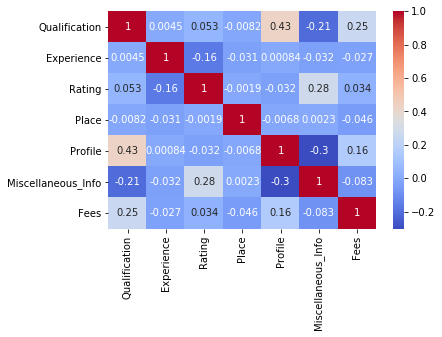

In [33]:
sns.heatmap(dfr,annot=True,cmap='coolwarm')
plt.show()

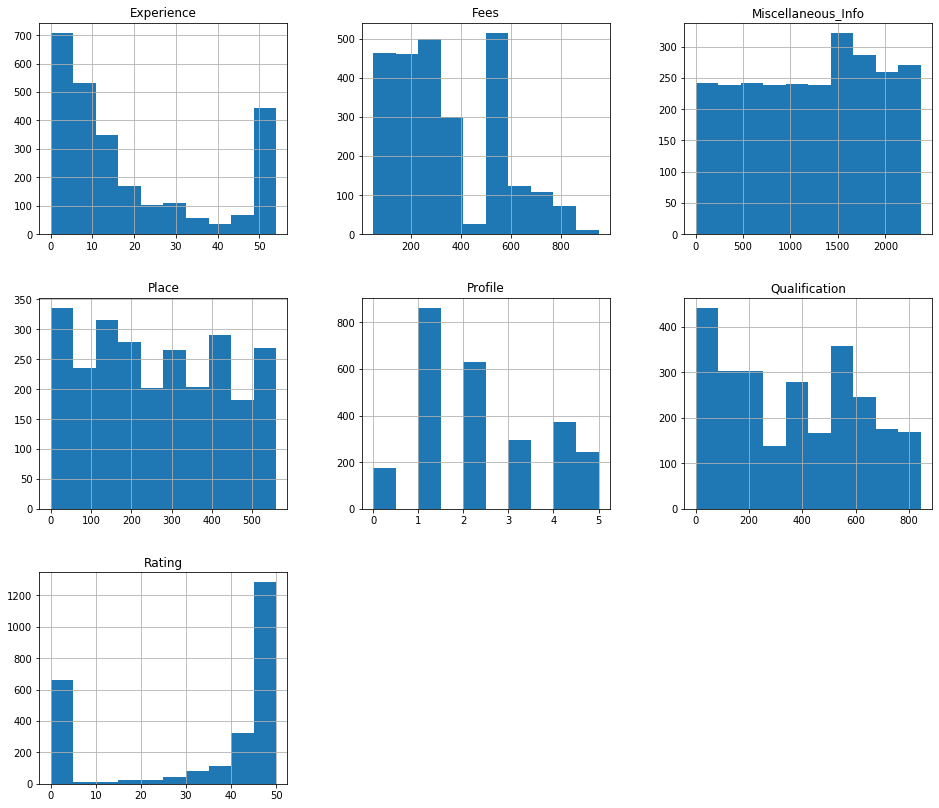

In [34]:
data.hist(figsize=(16,14))
plt.show()

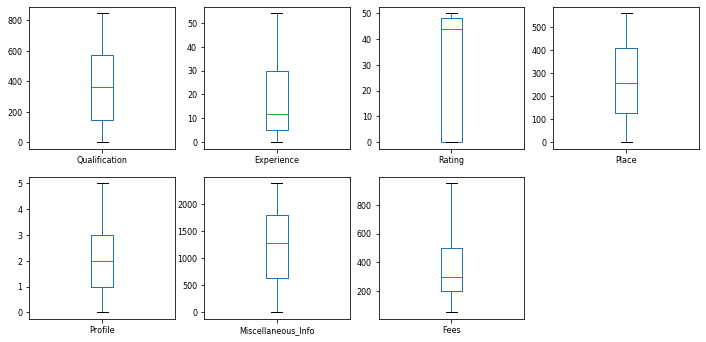

In [35]:
# checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

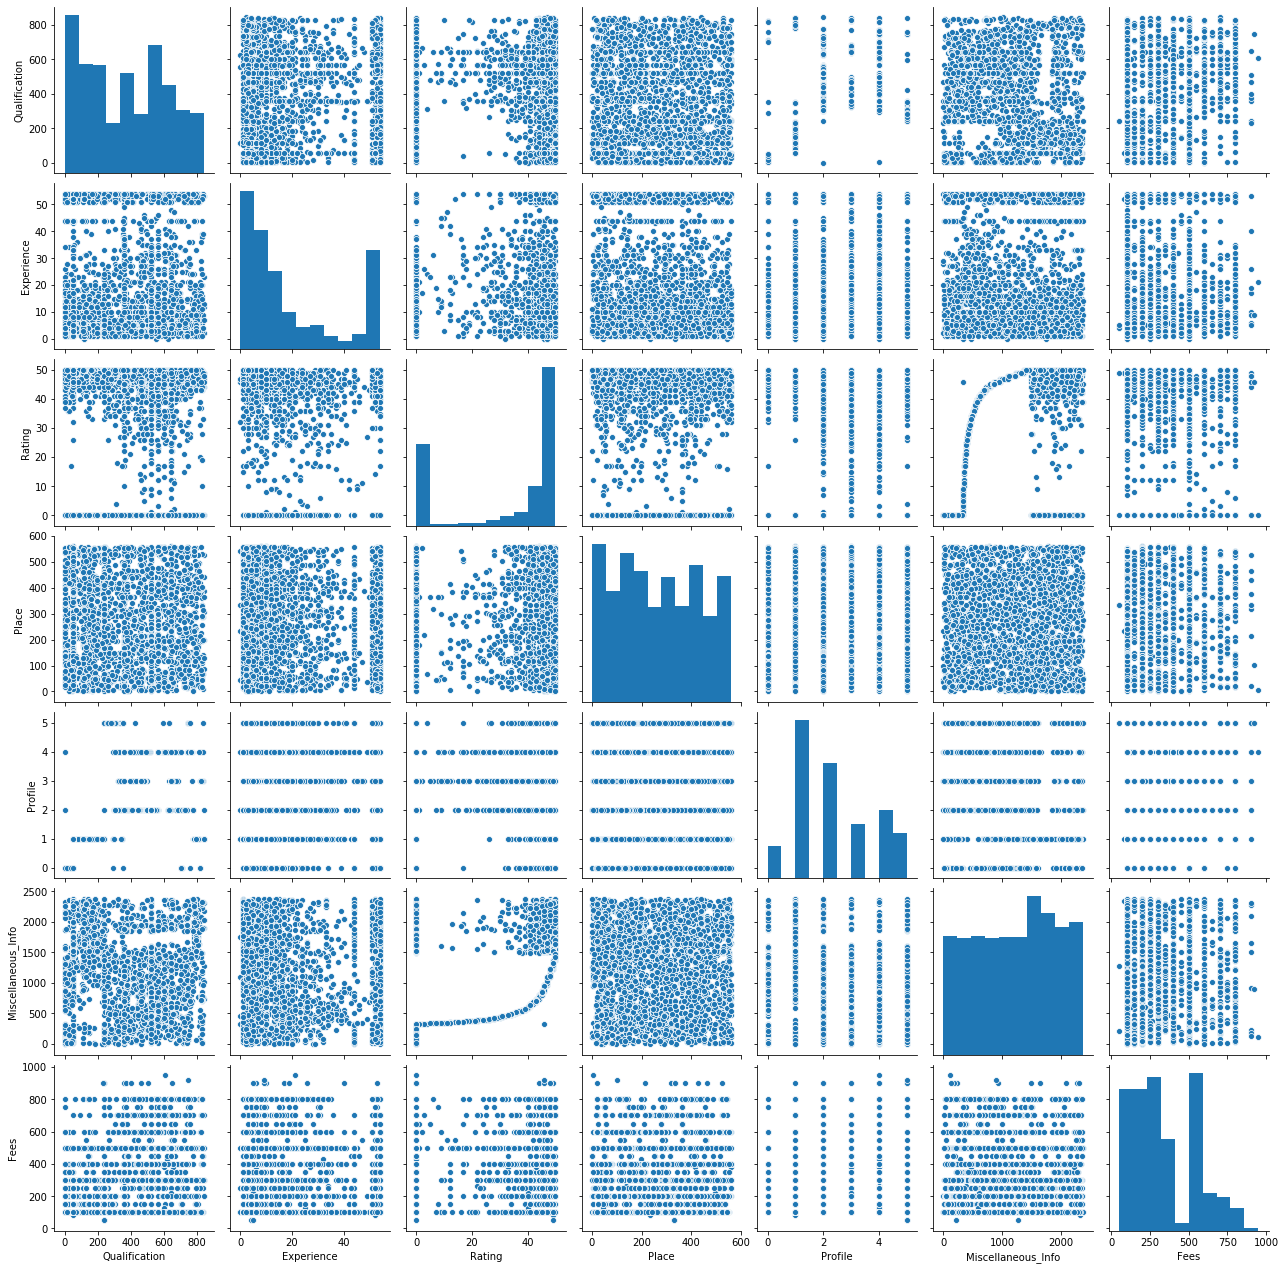

In [36]:
sns.pairplot(data)

In [37]:
# splitting the data into input and output :
X=data.drop('Fees',axis=1)
y=data['Fees']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
# importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [41]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)

In [42]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [43]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.06505135232331893
Mean_Squared_Error = 35667.43635872229
Cross_Val_Score =  0.0632155339659566


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.06557179768855159
Mean_Squared_Error = 35647.58184372968
Cross_Val_Score =  0.06324493936467201


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.06505407407732844
Mean_Squared_Error = 35667.33252629454
Cross_Val_Score =  0.06321586868877063


****************

In [44]:
final= pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
final

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.065051,35667.436,0.063216
1,Lasso,0.065572,35647.582,0.063245
2,Ridge,0.065054,35667.333,0.063216
3,DecisionTreeRegressor,-0.676146,63943.450,-0.640217
4,KNeighborsRegressor,-0.012103,38610.805,-0.067238
5,AdaBoostRegressor,0.107700,34040.426,0.094974
6,RandomForestRegressor,0.132627,33089.477,0.116951
7,GradientBoostingRegressor,0.174496,31492.208,0.144950


# Conclusion: we will go with RandomForestRegressor

In [45]:
import joblib
joblib.dump(RFR,'doctorfees.csv')

['doctorfees.csv']

In [46]:
model=joblib.load('doctorfees.csv')

In [47]:
model.predict(X_test)

array([424.7, 304. , 236. , 282.5, 382.1, 263.5, 468. , 258.5, 403. ,
       245.5, 493. , 255. , 367. , 332. , 315.5, 419.5, 459.5, 438. ,
       433.8, 447. , 243.5, 309. , 477. , 498. , 357. , 378.5, 423. ,
       439.5, 225.5, 487. , 275.5, 168.7, 208.5, 332.5, 360.1, 390.5,
       460. , 268.1, 228. , 288. , 233.5, 351.5, 374.5, 379. , 385. ,
       387. , 231. , 425. , 292. , 228. , 287.5, 278.6, 276.5, 256.5,
       217.5, 424. , 431.1, 355.5, 322.5, 423.5, 279.5, 463. , 415. ,
       303. , 227. , 425.5, 445.5, 275.5, 260.5, 474.5, 361. , 401.5,
       392.5, 306.5, 175. , 196. , 359.5, 252.9, 426.5, 531. , 458.5,
       437.5, 286.5, 287. , 167.5, 505.6, 428.5, 228. , 216.5, 282.5,
       522.5, 308. , 416.5, 579.5, 422.5, 330. , 489.5, 410. , 413.1,
       353.5, 416.5, 404.8, 432. , 293. , 256.6, 170. , 340. , 442.5,
       420.5, 434. , 191. , 485.5, 495. , 249.5, 408.8, 277.5, 338.5,
       282. , 448. , 284.5, 422.5, 256. , 319. , 419. , 441.5, 334.7,
       141. , 353. ,

In [48]:
import joblib
joblib.dump(RFR,'doctorfees.obj')

['doctorfees.obj']